<a href="https://www.kaggle.com/code/hipparkarrahul18/blood-glucose-prediction-using-neural-networks?scriptVersionId=218765185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="text-align: center; ">★ ANN 🩸📊 Blood Glucose Prediction ★</h1>


---

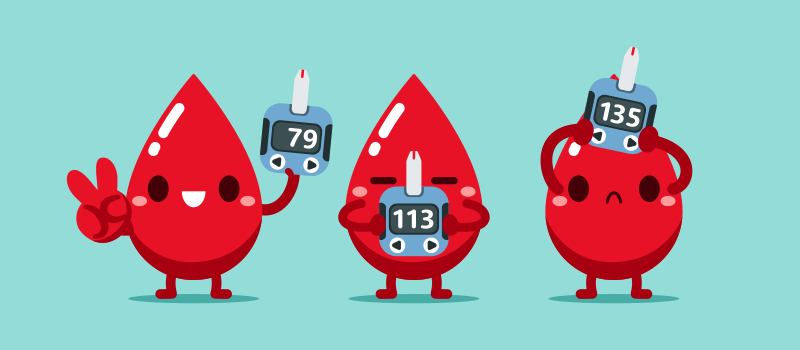

---

# ⏳  Introduction
#### *The dataset includes data from young adults in the UK with type 1 diabetes using a CGM, insulin pump, and smartwatch, capturing glucose readings, insulin dosages, carb intake, and activity data in five-minute intervals. The goal is to predict future blood glucose readings based on samples aggregated from the previous six hours. Training data from nine participants covers the first three months, while testing data from fifteen participants spans the remaining study period, ensuring no overlap and random order to prevent data leakage.*

<font color='blue' size='5' fornt = "itlic">Content </font> 
    
1. [📂 Load Dataset](#1)
2. [📝 Dataset Information](#2)
3. [🚀 Reduce Memory](#3)
4. [🛠️ Feature Selection](#4)
5. [🔍 Impute Missing values](#5)
6. [🧠 ANN Modeling](#6)
    * [📦 Plan for Model and Data Processing](#6)
    * [📊 Residuals](#8)

# 🛠️ Data Cleaning and Feature Engineering Plan


#### 📥 Step 1: Load the Dataset
   -   Set up the environment and load the data for further analysis.

#### 🔍 Step 2: Data Exploration
   -   Get a better understanding of the dataset’s structure, columns, and general statistics.

#### 🚫 Step 3: Check and Handle Missing Values
   -   Identify and handle any missing values to ensure clean, complete data for model training.

#### 📊 Step 4: Feature Engineering
   -   Extract new, meaningful features and prepare the data for better model performance.

#### 🎛️ Step 5: Feature Selection
   -   Identify and select features that contribute the most to model performance while reducing memory usage.

#### 🧠 Step 6: Model Training - Artificial Neural Network (ANN)
   -   Build and train a model to capture patterns and make accurate predictions.

#### 📝 Step 7: Submission Preparation
   -   Format predictions for submission and prepare the final output.

---

<a id = "1"></a><br>
# **📂 Load Dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import gc
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
# Load datasets using context managers
def load_datasets():
    try:
        # Load CSV files
        train=pd.read_csv("/kaggle/input/brist1d/train.csv")
        test=pd.read_csv("/kaggle/input/brist1d/test.csv")
        sample_submission=pd.read_csv("/kaggle/input/brist1d/sample_submission.csv")
        
        print("Datasets loaded successfully.")
        return train, test, sample_submission
    
    except Exception as e:
        print(f"Error loading datasets: {e}")
        return None
    
train, test, sample, = load_datasets()


Datasets loaded successfully.
CPU times: user 8.28 s, sys: 1.62 s, total: 9.9 s
Wall time: 12.1 s


In [3]:
test

id p_num      time  bg-5:55  bg-5:50  bg-5:45  bg-5:40  bg-5:35  \
0     p01_8459   p01  06:45:00      NaN      9.2      NaN      NaN     10.2   
1     p01_8460   p01  11:25:00      NaN      NaN      9.9      NaN      NaN   
2     p01_8461   p01  14:45:00      NaN      5.5      NaN      NaN      5.5   
3     p01_8462   p01  04:30:00      NaN      3.4      NaN      NaN      3.9   
4     p01_8463   p01  04:20:00      NaN      NaN      8.3      NaN      NaN   
...        ...   ...       ...      ...      ...      ...      ...      ...   
3639   p24_256   p24  06:40:00      7.3      7.3      7.1      6.7      6.8   
3640   p24_257   p24  12:30:00      6.0      6.2      6.2      6.2      5.8   
3641   p24_258   p24  03:45:00     12.4     12.5     12.7     13.1     13.2   
3642   p24_259   p24  06:10:00      8.3      8.3      8.2      8.2      7.8   
3643   p24_260   p24  03:10:00      9.9     10.1     10.0      9.9     10.0   

      bg-5:30  bg-5:25  ...  activity-0:45  activity-0:40  activity-0:35  \
0         NaN      NaN  ...            NaN            NaN            NaN   
1         9.4      NaN  ...            NaN            NaN            NaN   
2         NaN      NaN  ...            NaN            NaN            NaN   
3         NaN      NaN  ...            NaN            NaN            NaN   
4        10.0      NaN  ...            NaN            NaN            NaN   
...       ...      ...  ...            ...            ...            ...   
3639      6.8      6.9  ...            NaN            NaN            NaN   
3640      5.5      5.7  ...            NaN            NaN            NaN   
3641     13.3     13.0  ...            NaN            NaN            NaN   
3642      7.4      6.9  ...            NaN            NaN            NaN   
3643      9.7      9.7  ...            NaN            NaN            NaN   

      activity-0:30  activity-0:25  activity-0:20  activity-0:15  \
0               NaN            NaN            NaN            NaN   
1               NaN            NaN            NaN            NaN   
2               NaN            NaN            NaN            NaN   
3               NaN            NaN            NaN            NaN   
4               NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
3639            NaN            NaN            NaN            NaN   
3640            NaN            NaN            NaN            NaN   
3641            NaN            NaN            NaN            NaN   
3642            NaN            NaN            NaN            NaN   
3643            NaN            NaN            NaN            NaN   

      activity-0:10  activity-0:05  activity-0:00  
0               NaN            NaN            NaN  
1              Walk           Walk           Walk  
2               NaN            NaN            NaN  
3               NaN            NaN            NaN  
4               NaN            NaN            NaN  
...             ...            ...            ...  
3639            NaN            NaN            NaN  
3640            NaN            NaN            NaN  
3641            NaN            NaN            NaN  
3642            NaN            NaN            NaN  
3643            NaN            NaN            NaN  

[3644 rows x 507 columns]

In [4]:
sample

id  bg+1:00
0     p01_8459      9.6
1     p01_8460      4.6
2     p01_8461      8.0
3     p01_8462      9.9
4     p01_8463      5.3
...        ...      ...
3639   p24_256      6.3
3640   p24_257     10.4
3641   p24_258      6.9
3642   p24_259      8.7
3643   p24_260      6.4

[3644 rows x 2 columns]

<a id = "2"></a><br>
# **📝 Dataset Information**

In [5]:
# Display information for all datasets
# Display dataset information
def display_dataset_info(dataset, name):
    
    print("-----------------------------------------------------------------")

    print(f"{name} DataFrame Shape: Rows = {dataset.shape[0]}, Columns = {dataset.shape[1]}")
    
    total_missing = dataset.isnull().sum().sum()
    print(f"There are total {total_missing} missing values in the {name} DataFrame.") if total_missing > 0 else print(f"There are no missing values in the {name} DataFrame.")

    total_duplicates = dataset.duplicated().sum()
    print(f"There are {total_duplicates} duplicate rows in the {name} DataFrame.") if total_duplicates > 0 else print(f"There are no duplicate rows in the {name} DataFrame.")
    
    display(dataset.describe().style.set_caption(f"Descriptive Statistics for {name} Dataset").background_gradient(cmap="coolwarm"))
    print("-----------------------------------------------------------------")
    gc.collect()

datasets = [train, test, sample]
names = [ "Train", "Test", "Sample"]
for i in range(len(datasets)):
    display_dataset_info(datasets[i], names[i])

-----------------------------------------------------------------
Train DataFrame Shape: Rows = 177024, Columns = 508
There are total 40294794 missing values in the Train DataFrame.
There are no duplicate rows in the Train DataFrame.


-----------------------------------------------------------------
-----------------------------------------------------------------
Test DataFrame Shape: Rows = 3644, Columns = 507
There are total 862409 missing values in the Test DataFrame.
There are no duplicate rows in the Test DataFrame.


-----------------------------------------------------------------
-----------------------------------------------------------------
Sample DataFrame Shape: Rows = 3644, Columns = 2
There are no missing values in the Sample DataFrame.
There are no duplicate rows in the Sample DataFrame.


-----------------------------------------------------------------


<a id = "3"></a><br>
# **🚀 Reduce Memory**

In [6]:
# Function to reduce memory usage
def reduce_memory(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage before optimization: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            if str(col_type).startswith("int"):
                df[col] = pd.to_numeric(df[col], downcast="integer")
            elif str(col_type).startswith("float"):
                df[col] = pd.to_numeric(df[col], downcast="float")
        else:
            df[col] = df[col].astype("category")

    end_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage after optimization: {end_mem:.2f} MB")
    print(f"Reduced by {(100 * (start_mem - end_mem) / start_mem):.1f}%")

    return df

# Apply memory reduction
train = reduce_memory(train)
test = reduce_memory(test)

Memory usage before optimization: 686.10 MB
Memory usage after optimization: 311.18 MB
Reduced by 54.6%
Memory usage before optimization: 14.10 MB
Memory usage after optimization: 6.46 MB
Reduced by 54.2%


In [7]:
%%time

# Encode categorical variables  
categorical_columns = train.select_dtypes(include="category").columns  

for col in categorical_columns:  
    # Initialize the LabelEncoder  
    le = LabelEncoder()  
    
    # Fit and transform the categorical column  
    train[col] = le.fit_transform(train[col])  
    test[col] = le.fit_transform(test[col])
    # Save the encoder for inverse transformation later  

CPU times: user 2.62 s, sys: 3.12 ms, total: 2.63 s
Wall time: 2.63 s


In [8]:
# Drop columns with more than 60% missing values
numeric_columns = train.select_dtypes("number")
train = train.dropna(thresh=int(0.6 * len(train)), axis=1)


# Calculate the variance of each column
variances = numeric_columns.var()

# Identify columns with low variance
low_variance_cols = variances[variances < 1].index.tolist()

# Drop the low variance columns
train = train.drop(columns=low_variance_cols)

# Optionally, print the dropped columns for reference
print("Dropped columns with low variance:", low_variance_cols)


Dropped columns with low variance: ['activity-4:10', 'activity-4:00', 'activity-3:55', 'activity-3:45', 'activity-3:40', 'activity-3:30', 'activity-3:25', 'activity-3:15', 'activity-3:10', 'activity-3:00', 'activity-2:55', 'activity-2:45', 'activity-2:40', 'activity-2:30', 'activity-2:25', 'activity-2:20', 'activity-2:15', 'activity-2:10', 'activity-2:00', 'activity-1:55', 'activity-1:50', 'activity-1:45', 'activity-1:40', 'activity-1:35', 'activity-1:30', 'activity-1:25', 'activity-1:20', 'activity-1:15', 'activity-1:10', 'activity-1:05', 'activity-1:00', 'activity-0:55', 'activity-0:50', 'activity-0:45', 'activity-0:40', 'activity-0:35', 'activity-0:30', 'activity-0:25']


#### *The dataset originally had `40,294,794` null values. After eliminating columns with more than **60%** missing data, the count of null values reduced to `31,977,253`, a decrease of approximately **20.5%**. Additionally, 38 low-variance columns, representing a certain percentage of the dataset, were dropped to further streamline the data*

<a id = "4"></a><br>
# **🛠️ Feature Selection**

In [9]:
# Selected columns
selected_columns = [
     "bg-2:45", "bg-2:30", "bg-2:15", "bg-2:00", "bg-1:45", 
    "bg-1:30", "bg-1:15","bg-1:00", "bg-0:45", "bg-0:30", 
    "bg-0:15", "bg-0:00", "bg+1:00", 
    "activity-3:35", "activity-4:05", "activity-3:50", 
    "activity-4:20", "activity-4:15", "activity-4:25", 
    "activity-3:05", "activity-3:20", "activity-0:05", 
    "activity-2:50", "activity-2:35", "activity-2:05", 
    "activity-0:20", "activity-0:15", "activity-0:10", 
    "activity-0:00", "activity-4:35", "activity-4:30", 
    "id", "activity-4:40", "activity-5:30", "time", 
    "p_num", "activity-5:55", "activity-5:50", 
    "activity-5:45", "activity-5:40", "activity-5:35", 
    "activity-5:25", "activity-4:45", "activity-5:20", 
    "activity-5:15", "activity-5:10", "activity-5:05", 
    "activity-5:00", "activity-4:55", "activity-4:50", 
]

# Select columns for train and test
train = train[selected_columns]
test = test[[col for col in selected_columns if col in test.columns]]



#### *We chose the columns `bg-1:00` `bg-0:45` `bg-0:30` `bg-0:15` and other `blood glucose` measurements because they show the strongest correlations with the target column `bg+1:00`. Additionally, we included other columns that have no null values, as this enhances the overall performance of the model.*

<a id = "5"></a><br>
# **🔍 Impute Missing values**

In [10]:
%%time
from sklearn.impute import KNNImputer

numeric_trainColl = train.select_dtypes("number")  
numeric_testColl = test.select_dtypes("number")  

imputer = KNNImputer(n_neighbors=5)
train_imputed = imputer.fit_transform(numeric_trainColl)
train = pd.DataFrame(train_imputed, columns=numeric_trainColl.columns)

imputer = KNNImputer(n_neighbors=5)
test_imputed = imputer.fit_transform(numeric_testColl)
test = pd.DataFrame(test_imputed, columns=numeric_testColl.columns)
gc.collect()

del numeric_trainColl, numeric_testColl, train_imputed, test_imputed

print("Remaining missing values in train:", train.isnull().sum().sum())
print("Remaining missing values in test:", test.isnull().sum().sum())

Remaining missing values in train: 0
Remaining missing values in test: 0
CPU times: user 7min 53s, sys: 1min 24s, total: 9min 18s
Wall time: 8min 29s


#### *Use the KNN Imputer to fill in the missing values for your data set with the identifier 69040.* 

In [11]:
%%time
fig = px.histogram(train, x='bg+1:00', nbins=30, title='Histogram of Bg+1:00',   
                   labels={'bg+1:00': 'Value'})  
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')  
# Show the plot  
fig.show()

CPU times: user 945 ms, sys: 198 ms, total: 1.14 s
Wall time: 1.6 s


In [12]:
%%time
# Calculate Q1 (25th percentile) and Q3 (75th percentile)  
Q1 = train['bg+1:00'].quantile(0.25)  
Q3 = train['bg+1:00'].quantile(0.75)  

# Calculate IQR  
IQR = Q3 - Q1  
# Define the bounds for outliers  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

# Remove outliers  
df_cleaned = train[(train['bg+1:00'] >= lower_bound) & (train['bg+1:00'] <= upper_bound)]  
gc.collect()

del Q1, Q3, IQR, lower_bound, upper_bound

CPU times: user 131 ms, sys: 0 ns, total: 131 ms
Wall time: 130 ms


#### *To enhance accuracy, eliminate outliers from the "**`bg+1:00`**" columns using the interquartile range (IQR) method.*

In [13]:
%%time
# Create a histogram using Plotly  
fig = px.histogram(df_cleaned, x='bg+1:00', nbins=30, title='Histogram of Bg+1:00',   
                   labels={'bg+1:00': 'Value'})  

# Update layout for axes labels  
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')  

# Show the plot  
fig.show()

CPU times: user 83.4 ms, sys: 1.25 ms, total: 84.7 ms
Wall time: 83.7 ms


<a id = "6"></a><br>
# **🧠 ANN**


📊 **Data Splitting and Scaling**  
- Split: 80-20 (train-test split)  
- Standardize: Apply `StandardScaler` for feature stability  

➡️ **ANN Model Setup**  
- Layers: Three layers – 64 neurons (first layer), 32 neurons (second layer), 1 neuron (output layer)  
- Activation: ReLU for hidden layers, linear for output  

⚙️ **Compilation**  
- Optimizer: Adam  
- Loss: Mean Squared Error (MSE)  
- Emgo: Set Emgo metric to assess model robustness  

⏳ **Early Stopping**  
- Criterion: Stop if no improvement in validation loss for 10 epochs  
- Restore Best Weights: Enable to keep best-performing model 🏆  

📏 **Evaluation**  
- Primary Metric: Use RMSE for prediction accuracy  
- Additional Metric: Emgo for model stability and robustness evaluation  
----

In [14]:
%%time  
import gc
from sklearn.metrics import mean_squared_error  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
from keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping,ReduceLROnPlateau

X = df_cleaned.drop(columns="bg+1:00")  
y = df_cleaned['bg+1:00']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dropout(0.3))  # Dropout for regularization
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.3))  # Another dropout layer
ann_model.add(Dense(1))

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping and learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Clear memory
gc.collect()

# Train the model with early stopping and learning rate scheduler
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, 
                        validation_split=0.2, callbacks=[early_stopping, lr_scheduler])

# Predictions and RMSE calculation  
ann_predictions = ann_model.predict(X_test_scaled)  
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_predictions))  
gc.collect()


Epoch 1/100


I0000 00:00:1737549790.064683      70 service.cc:145] XLA service 0x7e47ec003bb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1737549790.064738      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  102/11043 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 62.9360

I0000 00:00:1737549793.245197      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11043/11043 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 9.3648 - val_loss: 3.8180 - learning_rate: 0.0010
Epoch 2/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.6082 - val_loss: 3.7296 - learning_rate: 0.0010
Epoch 3/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.1485 - val_loss: 3.6774 - learning_rate: 0.0010
Epoch 4/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 3.9390 - val_loss: 3.6292 - learning_rate: 0.0010
Epoch 5/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.8617 - val_loss: 3.5965 - learning_rate: 0.0010
Epoch 6/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 3.8229 - val_loss: 3.6283 - learning_rate: 0.0010
Epoch 7/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.7925 - val_loss: 3.6690 - learning_rate: 0.0010
Epoch 8/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.8054 - val_loss: 3.7659 - learning_rate: 0.0010
Epoch 9/100
11043/11043 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.7657 - val_loss:

730

ANN RMSE: 1.8497


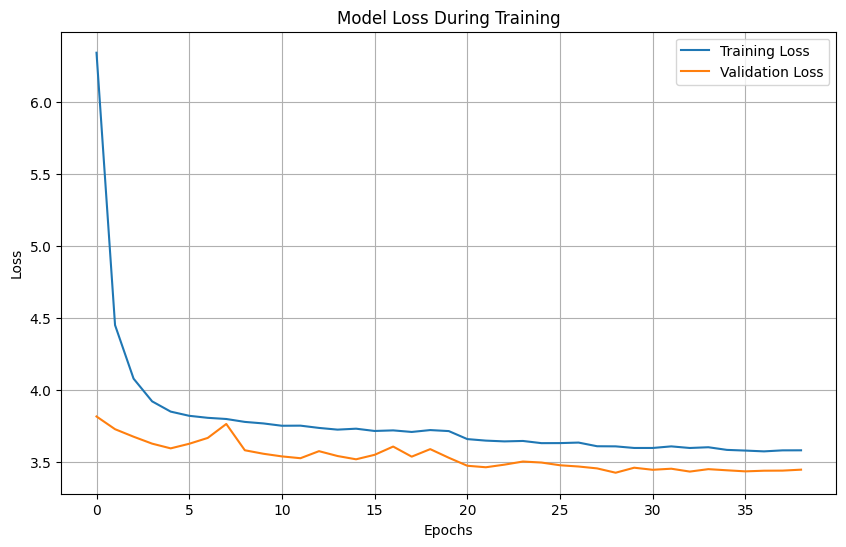

CPU times: user 415 ms, sys: 187 ms, total: 602 ms
Wall time: 351 ms


In [15]:
%%time
# Plotting the loss 
print(f"ANN RMSE: {ann_rmse:.4f}")  
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')  
plt.plot(history.history['val_loss'], label='Validation Loss')  

plt.title('Model Loss During Training')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.legend()  
plt.grid()  
plt.show()

<a id = "8"></a><br>
## **📊 Residuals**

#### *`Residual` plot is a graphical tool used in statistics and data science to assess the goodness of fit of a regression model. It shows the residuals (the differences between the observed values and the predicted values) on the vertical axis and the predicted values (or sometimes the independent variable) on the horizontal axis.*

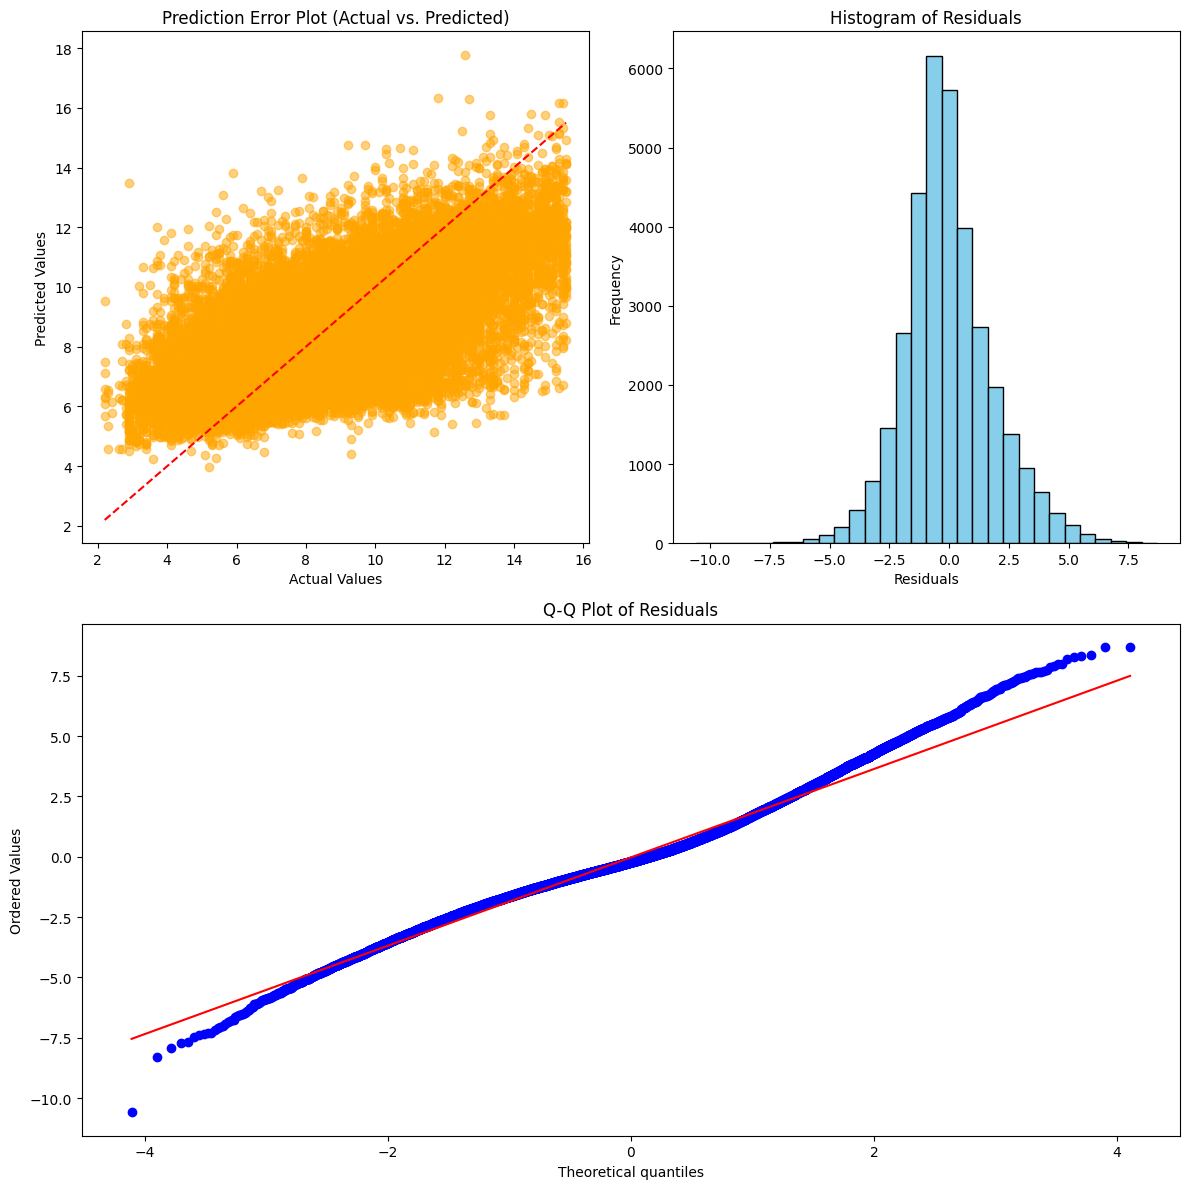

CPU times: user 1.27 s, sys: 366 ms, total: 1.64 s
Wall time: 1.12 s


In [16]:
%%time
import scipy.stats as stats

residuals = y_test.values - ann_predictions.flatten()

plt.figure(figsize=(12, 12))

# Prediction Error Plot (subplot 1)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
plt.scatter(y_test, ann_predictions, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction Error Plot (Actual vs. Predicted)")

# Histogram of Residuals (subplot 2)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# Q-Q Plot of Residuals (subplot 3 - on row 2, column span)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, third subplot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


### `Q-Q Plot`

- Assesses the normality of residuals.
- Deviations from the straight line indicate non-normality, suggesting potential issues with the model's assumptions.

### `Histogram of Residuals`
- Visualizes the distribution of residuals.
- Ideally, the distribution should be centered around zero and approximately bell-shaped (normal).
- In this case, the distribution appears roughly normal, with some slight skewness to the right.

### `Prediction Error Plot`
- Evaluates the accuracy of the model's predictions.
- Points close to the diagonal line indicate accurate predictions.
- Deviations from the line suggest errors in the model's predictions.

#### *Based on the provided plots, the model appears to be performing reasonably well. The residuals are approximately normally distributed, and the predictions are relatively accurate. However, the slight skewness in the residuals and some deviations from the diagonal line in the prediction error plot suggest that there may be room for improvement.*

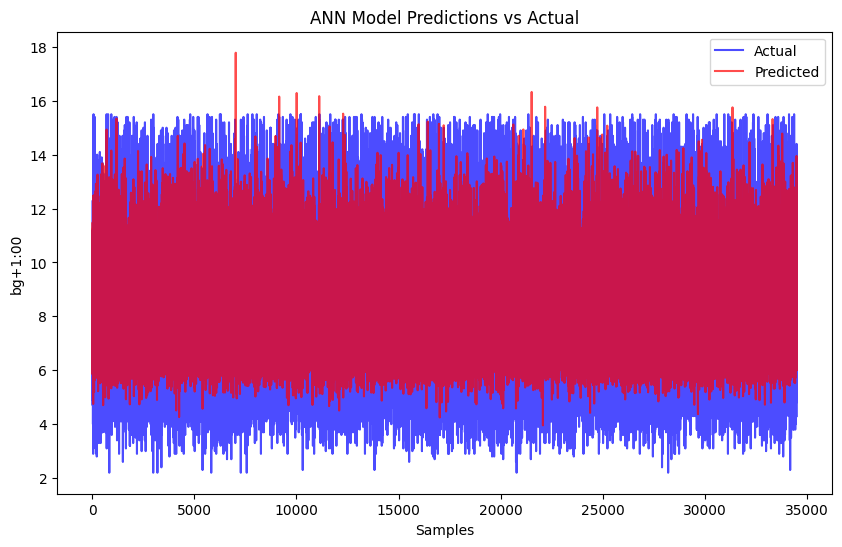

In [17]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual", color='blue', alpha=0.7)
plt.plot(ann_predictions, label="Predicted", color='red', alpha=0.7)
plt.xlabel("Samples")
plt.ylabel("bg+1:00")
plt.title("ANN Model Predictions vs Actual")
plt.legend()
plt.show()

#### *The provided image shows a plot comparing the actual and predicted values of an Artificial Neural Network (ANN) model. The model struggles to capture the variability in the actual data, often predicting values closer to the average. To improve the model's performance, consider increasing its complexity, cleaning the data, exploring feature engineering, tuning hyperparameters, and using regularization techniques.*

# **🌐 Submission file**

In [18]:
# Ensure test data doesn't have 'bg+1:00' column
test_data = test.drop(columns=[col for col in ['bg+1:00'] if col in test.columns])

# Standardize the test data using the scaler fitted on the train data
test_scaled = scaler.transform(test_data)

# Make predictions on the test data
test_predictions = ann_model.predict(test_scaled)

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': sample['id'],  # Using 'id' from the test DataFrame
    'bg+1:00': test_predictions.flatten()  # Flatten predictions to match the shape of the DataFrame
})

# Save the submission file
submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")


114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Submission file 'submission.csv' created successfully.


In [19]:
submission

id   bg+1:00
0     p01_8459  4.844751
1     p01_8460  3.368959
2     p01_8461  4.423168
3     p01_8462  4.906801
4     p01_8463  3.100071
...        ...       ...
3639   p24_256  2.989088
3640   p24_257  4.562697
3641   p24_258  3.470766
3642   p24_259  3.903003
3643   p24_260  2.850278

[3644 rows x 2 columns]

## **🧑‍💻 Summary**

#### *The dataset initially had **40,294,794** missing values, which were reduced to **31,977,253** (a `20.5%` decrease) by removing columns with more than 50% missing data. Additionally, 38 low-variance columns were dropped to streamline the dataset. Relevant features, such as `'bg-1:00'`  `'bg-0:45'`  `'bg-0:30'`  `'bg-0:15'` and  `'bg-0:00'`  were selected for their high correlation with the target variable 'bg+1:00', and columns with no missing values were retained for model efficiency.*

#### *Outliers in the `'bg+1:00'` column were removed using the Interquartile Range (IQR) method to improve data quality.*

#### *An **Artificial Neural Network (ANN)** model was trained on the preprocessed data, achieving a Root Mean Squared Error **(RMSE) of 1.81**. The model's residuals showed a reasonable fit with a normal distribution, though slight skewness and deviations from the expected error distribution suggest room for improvement.*


----

😊 **If you found this notebook useful, please consider upvoting and sharing your thoughts in the comments! Your feedback is invaluable in fostering a collaborative learning environment.**  
<h1 style="text-align: center;">👍Show your support by upvoting this notebook! </h1>

----